In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
df_labeled = pd.read_csv("/Users/hetavpatel/Desktop/Data Science/Grad DS Work/DSCI 601 Applied Data Science/old_repos/NLPPunePorsche/LLMsTM/AnishaopenCodingCommentsLabeled.csv")

In [26]:
df_labeled["Label"].value_counts()

Label
6    557
1    148
5    140
3     77
7     42
4     22
2     14
Name: count, dtype: int64

/var/folders/xr/0vdqp3k12gn7yn75q4893hsm0000gn/T/ipykernel_66011/2345370311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label", data=df_labeled, palette="cubehelix")


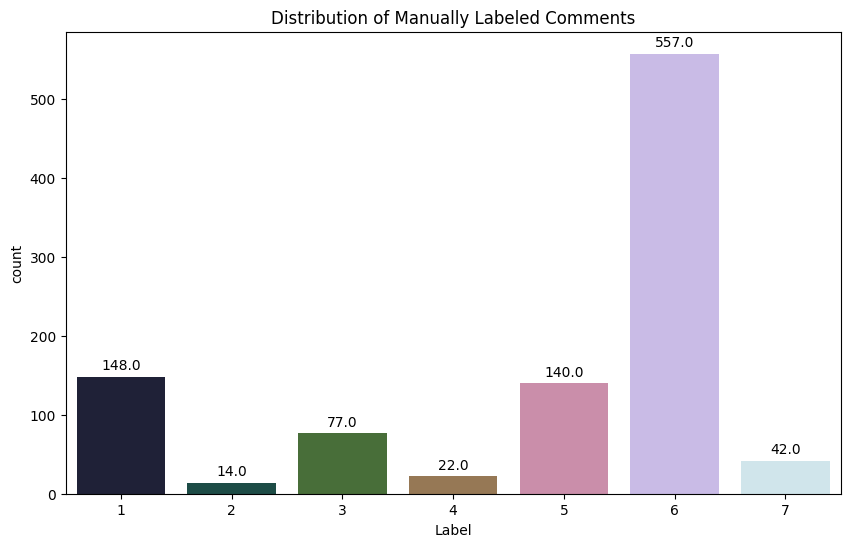

In [27]:
# Plot the distribution of the manually labels comments using seaborn 
plt.figure(figsize=(10, 6))
sns.countplot(x="Label", data=df_labeled, palette="cubehelix")
plt.title("Distribution of Manually Labeled Comments")
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

In [28]:
# each bar shows the major topic of the comment that the commenter wrote in the video.
# The labels are:
# 1 - "Judicial Accountability and Policy Demands"
# 2 - "Public Safety"
# 3 - "Socioeconomic Privilege"
# 4 - "Victim Sympathy"
# 5 - "Anger or Outrage"
# 6 - "Irrelevant/General Comments"
# 7 - "Views on Similar Cases in the Past"

In [29]:
#make another column with the textual description of the label
def label_to_text(label):
    if label == 1 or label == 1.0:
        return "Judicial Accountability and Policy Demands"
    elif label == 2 or label == 2.0:
        return "Public Safety"
    elif label == 3 or label == 3.0:
        return "Socioeconomic Privilege"
    elif label == 4 or label == 4.0:
        return "Victim Sympathy"
    elif label == 5 or label == 5.0:
        return "Anger or Outrage"
    elif label == 6 or label == 6.0:
        return "Irrelevant/General Comments"
    elif label == 7 or label == 7.0:
        return "Views on Similar Cases in the Past"
    else:
        return "Unknown or might need to be fixed"
    
df_labeled["Label_Topic"] = df_labeled["Label"].apply(label_to_text)

/var/folders/xr/0vdqp3k12gn7yn75q4893hsm0000gn/T/ipykernel_66011/48290185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label_Topic", data=df_labeled, palette="cubehelix")


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Irrelevant/General Comments'),
  Text(1, 0, 'Socioeconomic Privilege'),
  Text(2, 0, 'Judicial Accountability and Policy Demands'),
  Text(3, 0, 'Anger or Outrage'),
  Text(4, 0, 'Victim Sympathy'),
  Text(5, 0, 'Public Safety'),
  Text(6, 0, 'Views on Similar Cases in the Past')])

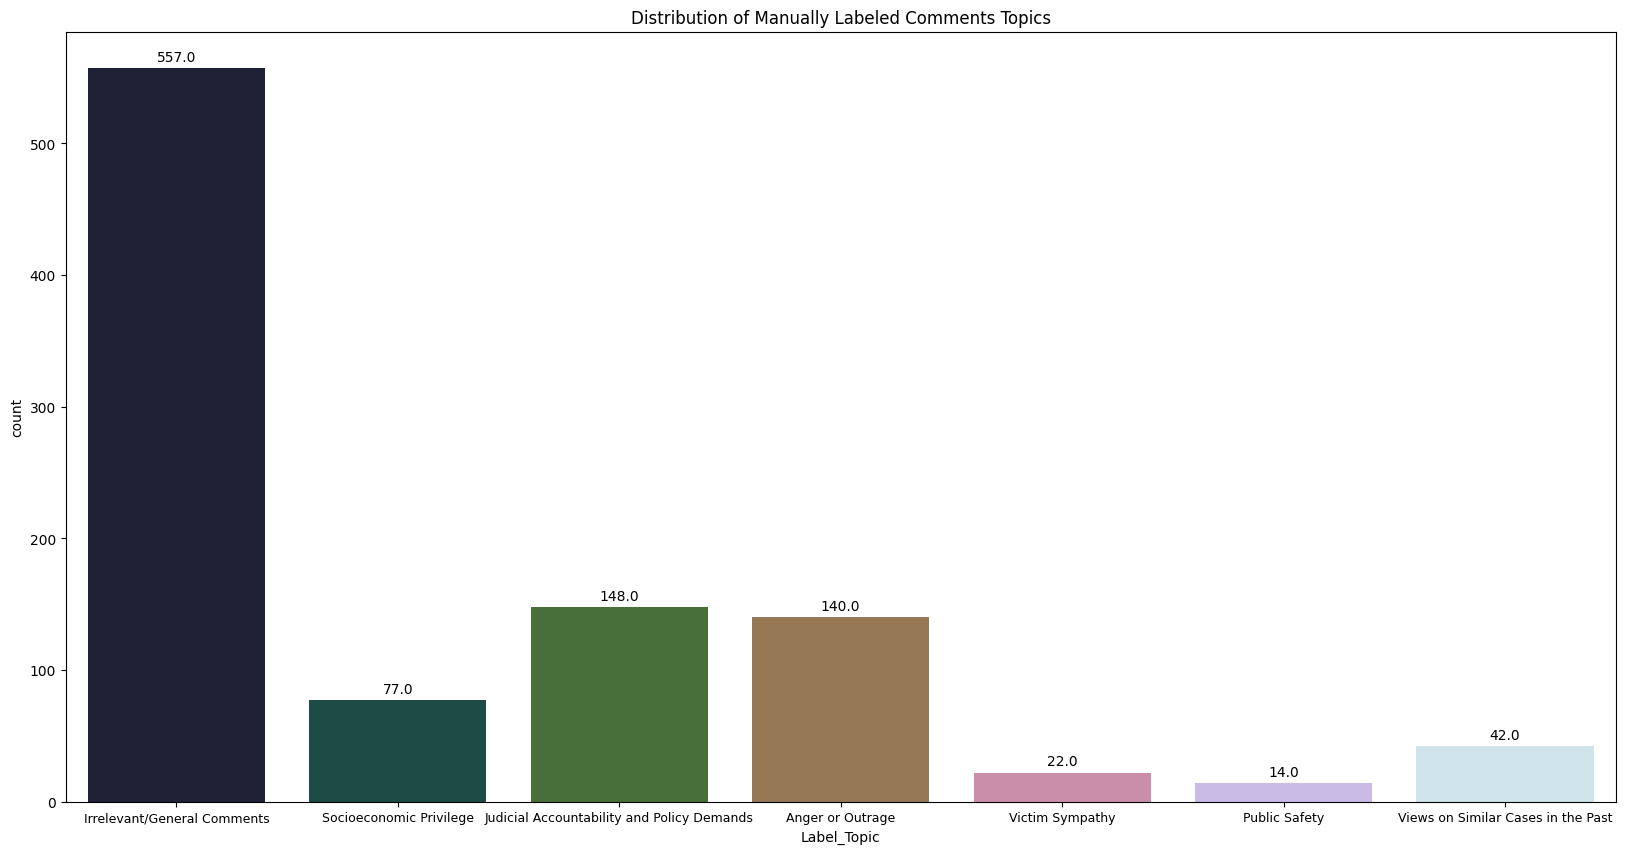

In [30]:
#now plot the distribution of the manually labeled comments topics using seaborn
plt.figure(figsize=(20, 10))
sns.countplot(x="Label_Topic", data=df_labeled, palette="cubehelix")
plt.title("Distribution of Manually Labeled Comments Topics")
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
    
#the text of the x_axs is overlapping each other, so reduce it's font size or do something else so that each column is clear, you can increase the cahart size too
plt.xticks(fontsize=9)
    

In [31]:
df_sample_phi3_trial = pd.read_csv("/Users/hetavpatel/Desktop/Data Science/Grad DS Work/DSCI 601 Applied Data Science/old_repos/NLPPunePorsche/openCoding/youtube_comments_unlabeled.csv")

#take a sample of 10000 comments from the df_sample_phi3_trial dataframe which have lang = en
df_sample_phi3_trial = df_sample_phi3_trial[df_sample_phi3_trial["lang"] == "en"]
df_sample_phi3_trial = df_sample_phi3_trial.sample(n=10000, random_state=42)

#save the sample to a csv file
df_sample_phi3_trial.to_csv("/Users/hetavpatel/Desktop/Data Science/Grad DS Work/DSCI 601 Applied Data Science/old_repos/NLPPunePorsche/LLMsTM/unlabeled_sampled.csv", index=False)

In [32]:
df_sample = pd.read_csv("/Users/hetavpatel/Desktop/Data Science/Grad DS Work/DSCI 601 Applied Data Science/old_repos/NLPPunePorsche/LLMsTM/labeled_sampled.csv")

#only choose the first 100 rows from the df_sample dataframe
df_sample = df_sample.iloc[:150, :]
#make a csv file with the comments i.e the column "textCleaned" and the labels i.e. the column "label" from the df_sample dataframe
df_sample = df_sample[["textCleaned", "label"]]
#apply label_to_text function to the label column of the df_sample dataframe and save it to a new column "label_text"
df_sample["Label_Topic"] = df_sample["label"].apply(label_to_text)

df_sample.to_csv("/Users/hetavpatel/Desktop/Data Science/Grad DS Work/DSCI 601 Applied Data Science/old_repos/NLPPunePorsche/LLMsTM/labeled_sampled_output.csv", index=False)


/var/folders/xr/0vdqp3k12gn7yn75q4893hsm0000gn/T/ipykernel_66011/3956589138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label_Topic", data=df_sample, palette="cubehelix")


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Public Safety'),
  Text(1, 0, 'Anger or Outrage'),
  Text(2, 0, 'Irrelevant/General Comments'),
  Text(3, 0, 'Victim Sympathy'),
  Text(4, 0, 'Socioeconomic Privilege'),
  Text(5, 0, 'Judicial Accountability and Policy Demands'),
  Text(6, 0, 'Views on Similar Cases in the Past')])

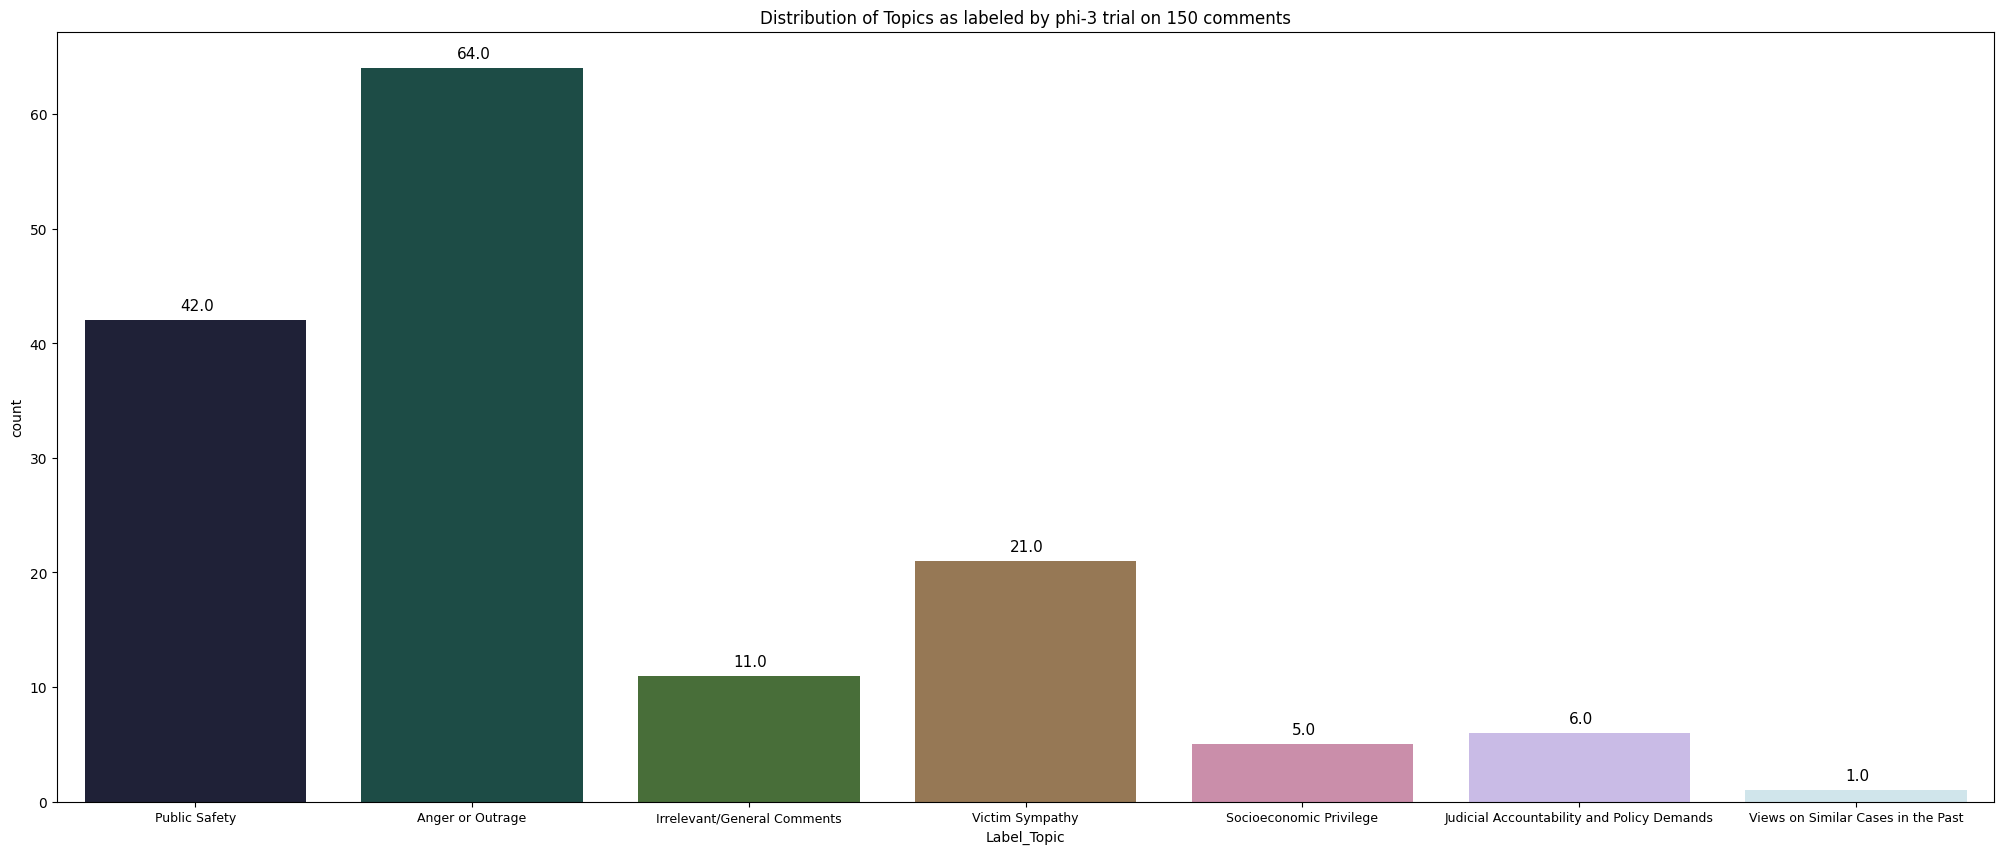

In [33]:
#now plot the distribution of the manually labeled comments topics using seaborn
plt.figure(figsize=(25, 10))
sns.countplot(x="Label_Topic", data=df_sample, palette="cubehelix")
plt.title("Distribution of Topics as labeled by phi-3 trial on 150 comments")
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=11, color='black', xytext=(1, 7), textcoords='offset points')
    
#the text of the x_axs is overlapping each other, so reduce it's font size or do something else so that each column is clear, you can increase the cahart size too
plt.xticks(fontsize=9)

Plot the distribution for the final output on the entire unlabeled comments corpus using llama3 70b

In [34]:
df_whole_english = pd.read_csv("/Users/hetavpatel/Desktop/Data Science/Grad DS Work/DSCI 601 Applied Data Science/old_repos/NLPPunePorsche/LLMsTM/final_output/youtube_comments_unlabeld_english_llm_output_v2.csv")

In [35]:
#take only the comments in account which has "llm_output" strictly as 1, 2, 3, 4, 5, 6, 7. also keep a note of the columns classified as something else in another dataframe.
df_whole_english_other = df_whole_english[~df_whole_english["llm_output"].isin(["1", "2", "3", "4", "5", "6", "7"])]
df_whole_english = df_whole_english[df_whole_english["llm_output"].isin(["1", "2", "3", "4", "5", "6", "7"])]

#give me the count of each label
df_whole_english["llm_output"].value_counts()

print(df_whole_english.shape)

#convert the column llm_output to integer
df_whole_english["llm_output"] = df_whole_english["llm_output"].astype(int)

(92834, 4)


In [36]:
df_whole_english_other.shape

(795, 4)

In [37]:
df_whole_english_other["llm_output"].value_counts()

# i want to see all the 138 different values in the column llm_output of the dataframe df_whole_english_other no ...
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_whole_english_other["llm_output"].unique()

array([nan, 'llama3:70b',
       'I\'d be happy to help!\n\nTo classify the comment, I\'ll analyze its content and meaning. Here\'s my approach:\n\n1. **Language understanding**: Since the comment is in Hindi, I\'ll use machine translation tools (e.g., Google Translate) to translate it into English.\n2. **Text analysis**: After translating the text, I\'ll analyze its content, tone, and intent.\n\nHere\'s the translated comment:\n"You have used very good pictures, that\'s why it\'s easy to understand."\n\n**Classification**:\n\nBased on the analysis, I would classify this comment as **6 - Irrelevant/General Comments**. The comment is not related to the accident in India or any of the other predefined labels/topics. It appears to be an off-topic remark about the quality of pictures used in the video.\n\nPlease note that I\'ve been strict about irrelevant comments, as per your request. If you have any further questions or need clarification, feel free to ask!',
       '1, 3, 4, 5', '2, 3,

In [38]:
df_whole_english["Label_Topic"] = df_whole_english["llm_output"].apply(label_to_text)

/var/folders/xr/0vdqp3k12gn7yn75q4893hsm0000gn/T/ipykernel_66011/4110508590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label_Topic", data=df_whole_english, palette="cubehelix")


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Anger or Outrage'),
  Text(1, 0, 'Views on Similar Cases in the Past'),
  Text(2, 0, 'Irrelevant/General Comments'),
  Text(3, 0, 'Public Safety'),
  Text(4, 0, 'Socioeconomic Privilege'),
  Text(5, 0, 'Victim Sympathy'),
  Text(6, 0, 'Judicial Accountability and Policy Demands')])

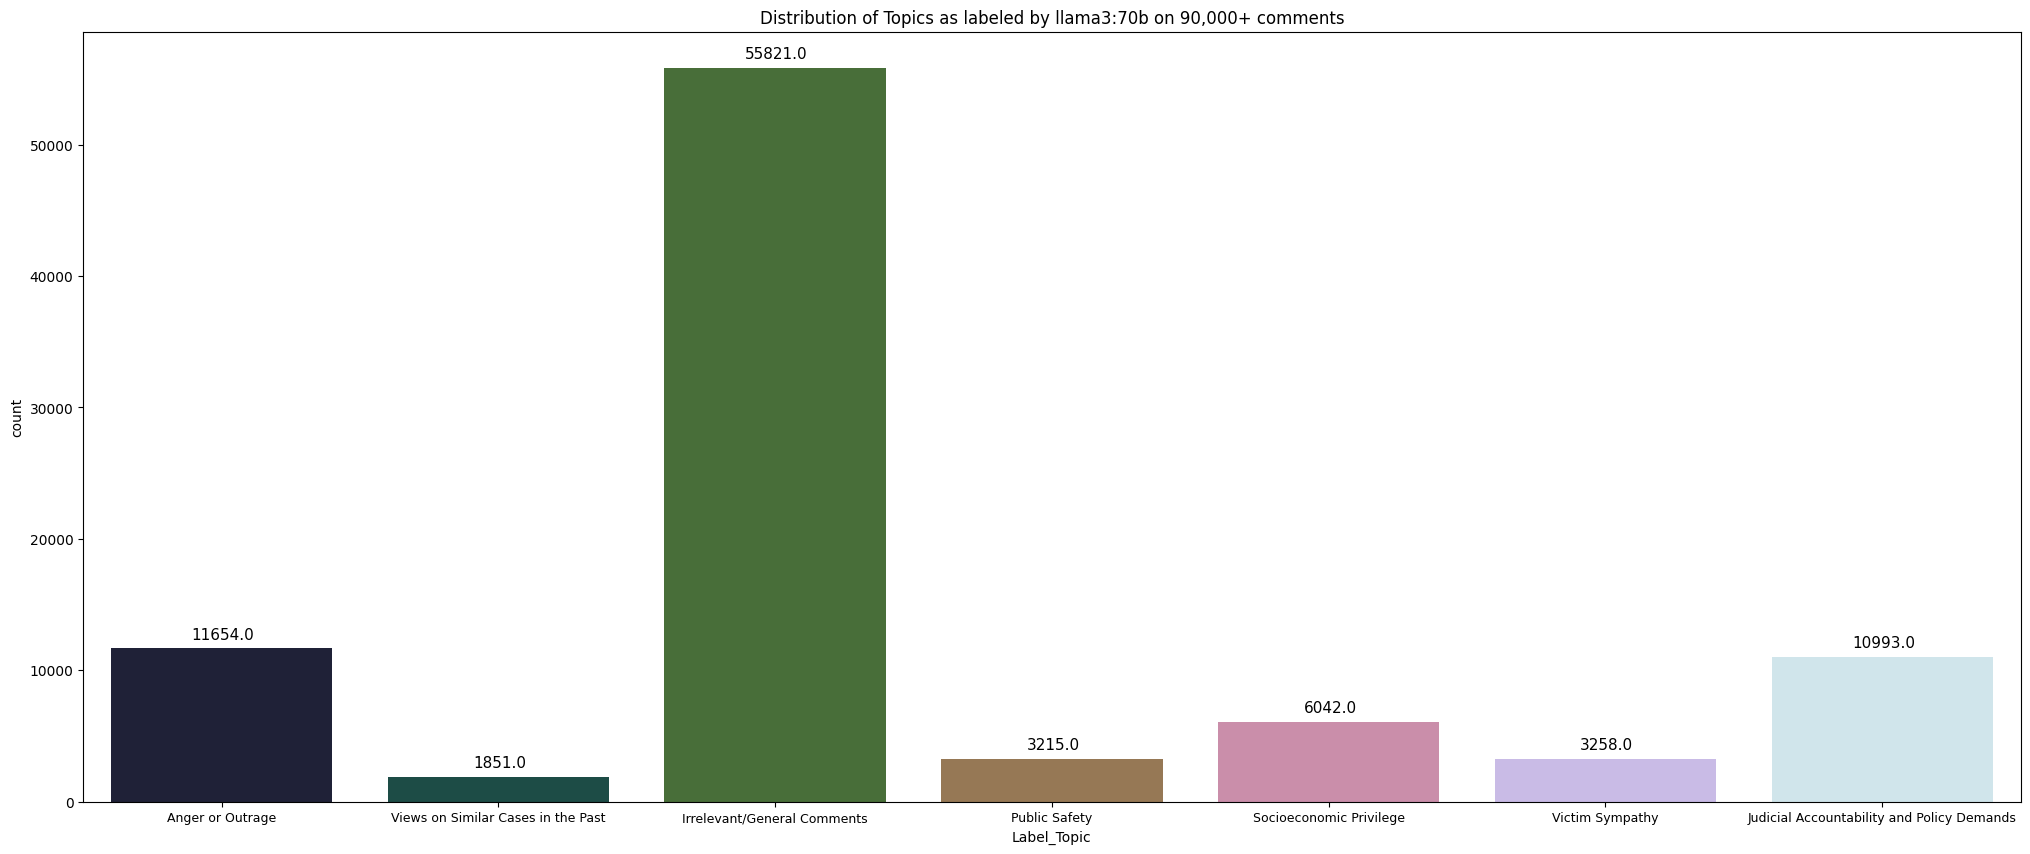

In [39]:
#now plot the distribution of the manually labeled comments topics using seaborn
plt.figure(figsize=(25, 10))
sns.countplot(x="Label_Topic", data=df_whole_english, palette="cubehelix")
plt.title("Distribution of Topics as labeled by llama3:70b on 90,000+ comments")
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=11, color='black', xytext=(1, 7), textcoords='offset points')
    
#the text of the x_axs is overlapping each other, so reduce it's font size or do something else so that each column is clear, you can increase the cahart size too
plt.xticks(fontsize=9)

In [40]:
pd.set_option('display.max_colwidth', None)
df_whole_english[df_whole_english["Label_Topic"] == "Anger or Outrage"].head(20)

,id,text,llm_output,llm_model,Label_Topic
0,UgxHddIqyh0yjsul8Td4AaABAg,Talented log mar gye or useless ladka bach gya :crying_face:,5,llama3:70b,Anger or Outrage
80,UgyntHXw1FAf5kk10R54AaABAg,But insurance Bhi fake h….discussable\nInsurance tax 18% -discussable \nSo be Get selfishly?\nIt’s not ethical,5,llama3:70b,Anger or Outrage
119,UgyGqoMLy6PwhjA3WnN4AaABAg,Bigot rather he speaks as if he is the master of everything. 0 knowledge 100% ability to fool people.,5,llama3:70b,Anger or Outrage
204,Ugy4dpQ4HdyQsXlAXvZ4AaABAg,This hero didnt told about amount settlement ratio...but talked about claim settlement amount...what a waste of time !!,5,llama3:70b,Anger or Outrage
673,UgwWBK0ZaofLypQi_Il4AaABAg,Sorry brother i used to watch your video and trust you but after seeing your video on atul subhas case my trust got break - u didn't even touch the core of the case as turn the narrative :face_exhaling:,5,llama3:70b,Anger or Outrage
746,UgyQn_W4MztwWSN5gO14AaABAg,"But claim rejection k chance bahot h, uske liye kya jare h koi trustworthy?",5,llama3:70b,Anger or Outrage
865,Ugx3v1XxgWheAr3Ne7h4AaABAg,"I am Tufail Ahmed from Sahibganj district, Jharkhand.\n\nI am currently reading at class 10 and my father works in DRDA but the sad thing is that my father was employed at a permanent post and in another office but at the early 2000s my father and his some of staffs were scammed and given another low post but still everything was fine but then from 2014 the salary started stucking and then the salary became half . They filed a case in jharkhand high court and they also got a degree but nothing is working.We are facing a very critical financial condition as we don't get any salary from the last 8 months.\n\nYou are one of the famous youtuber please make a video in this topic and for more authentic research you can also contact me I'll provide you every information.\n\nPlease help us you are only hope",5,llama3:70b,Anger or Outrage
960,Ugx8L_8dx_o99WgIXWl4AaABAg,"Insurance Companies Sabse Bara Scam Hai, Log Marne Ke Bad Terms & Conditions Dikha Ke Claim Reject Kar Dete Hai ! :crying_face:",5,llama3:70b,Anger or Outrage
1015,Ugy4dYC4kLMfO11i3Jx4AaABAg,it triggers my death anxiety!,5,llama3:70b,Anger or Outrage
1407,Ugw7ArYz5dVyZxllyHV4AaABAg,What??!!,5,llama3:70b,Anger or Outrage


We are going to sample out 150 comments from each section of the comments classified by llama3. this is for evaluation and human annotation purposes. Save them in the final_output folder.

In [41]:
df_whole_english.head()

,id,text,llm_output,llm_model,Label_Topic
0,UgxHddIqyh0yjsul8Td4AaABAg,Talented log mar gye or useless ladka bach gya :crying_face:,5,llama3:70b,Anger or Outrage
1,UgyXc3KpEOAUlkmt2_t4AaABAg,what are the updates in pune porsche case? did anything happen to that kid or is the matter still ongoing? tareekh pe tareekh and ye muddaa bhi dab jayega aur log bhool jayenge,7,llama3:70b,Views on Similar Cases in the Past
2,Ugyw8L59M6ihi0eP5Xd4AaABAg,:red_heart::red_heart::red_heart::red_heart:,6,llama3:70b,Irrelevant/General Comments
3,UgyFc72W7wVSo1sfGSZ4AaABAg,Dhruv Rathi,6,llama3:70b,Irrelevant/General Comments
4,UgyM797LHVompSnbHa94AaABAg,Respect Dhurv Rathee Bottom :red_heart::red_heart:,6,llama3:70b,Irrelevant/General Comments


In [42]:
#sample out 150 comments for each label topic into another dataframe and then jumble them up
# Sample 150 comments for each label topic
sampled_df = df_whole_english.groupby('llm_output').apply(lambda x: x.sample(n=150, random_state=1)).reset_index(drop=True)
shuffled_df = sampled_df.sample(frac=1, random_state=1).reset_index(drop=True)

#remove the values from columns "llm_output" and "Label_Topic" from the dataframe shuffled_df


shuffled_df.to_csv("/Users/hetavpatel/Desktop/Data Science/Grad DS Work/DSCI 601 Applied Data Science/old_repos/NLPPunePorsche/LLMsTM/final_output/comments_llama_for_manual_labeling.csv", index=False)
print(shuffled_df.shape)
shuffled_df.value_counts()


(1050, 5)


/var/folders/xr/0vdqp3k12gn7yn75q4893hsm0000gn/T/ipykernel_66011/3337513568.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df_whole_english.groupby('llm_output').apply(lambda x: x.sample(n=150, random_state=1)).reset_index(drop=True)


id                          text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        